In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
import os


In [2]:
sys.path.append(os.path.abspath(".."))

In [3]:
# Importing preprocess_data function from .py file
from scripts.data_preprocessing_script import preprocess_data

In [4]:

data_source = '../data/raw/life_expectancy_data.csv'

In [5]:
# Loading and preprocessing the data
df_processed = preprocess_data(data_source)

In [7]:
# Splitting the data into feature variables (X) and target variable (y)
X = df_processed.drop('life expectancy', axis=1)
y = df_processed['life expectancy']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Trainning model
lasso_model = Lasso(alpha=0.0001, random_state=42)
lasso_model.fit(X_train, y_train)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.001e-01, tolerance: 1.371e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001, random_state=42)

In [10]:
# Making predictions
y_pred = lasso_model.predict(X_test)



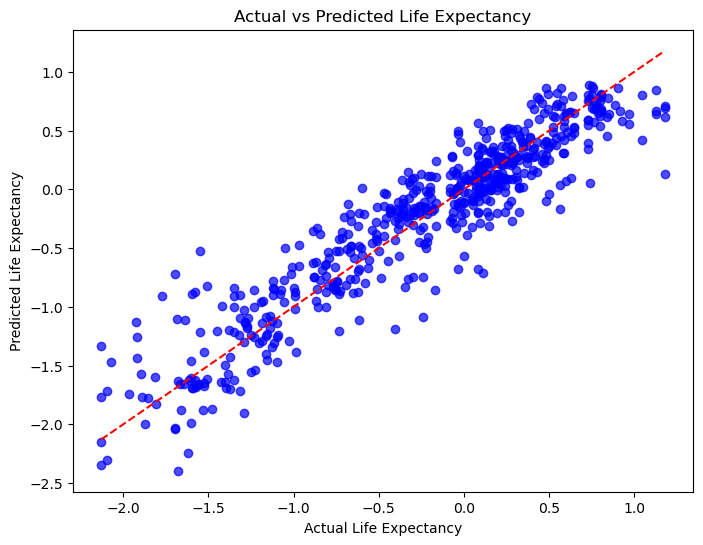

In [11]:
# Plotting Life Expectancy - Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

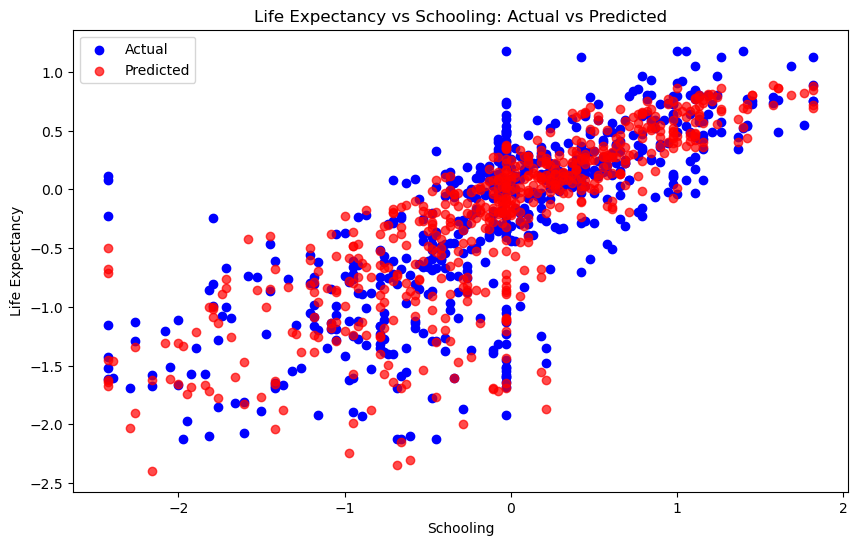

In [12]:
# Plotting actual vs predicted values of Life Expectancy Vs Schooling 
plt.figure(figsize=(10, 6))

plt.scatter(X_test['schooling'], y_test, color='blue', label='Actual')

plt.scatter(X_test['schooling'], y_pred, color='red', label='Predicted', alpha=0.7)

plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Schooling: Actual vs Predicted')
plt.legend()

plt.show()


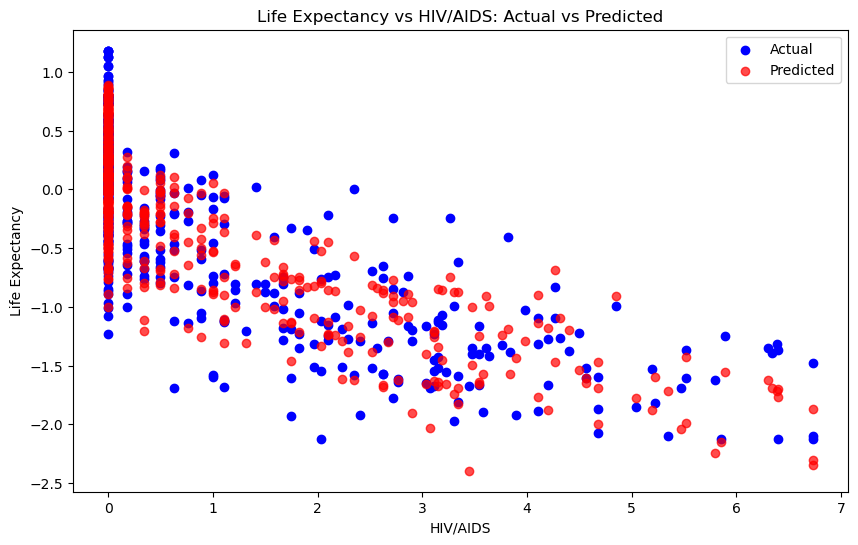

In [13]:
# Plotting Actual vs Predicted values of Life Expectancy and HIV/AIDS
plt.figure(figsize=(10, 6))

plt.scatter(X_test['hiv/aids'], y_test, color='blue', label='Actual')

plt.scatter(X_test['hiv/aids'], y_pred, color='red', label='Predicted', alpha=0.7)

plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs HIV/AIDS: Actual vs Predicted')
plt.legend()

plt.show()

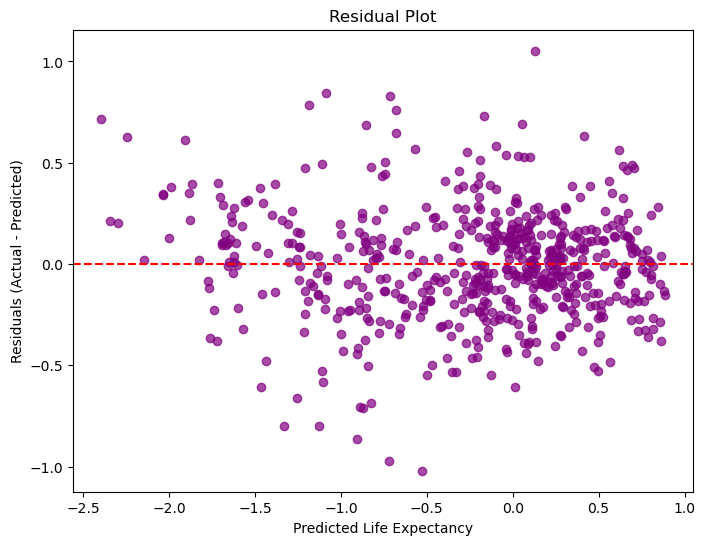

In [14]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

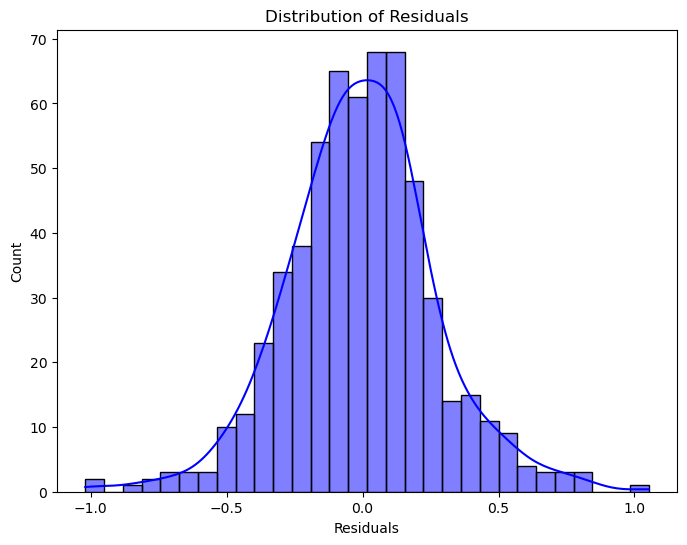

In [15]:
# Plotting distribution of residuals - which is normally distributed

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+00, tolerance: 1.021e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.707e+00, tolerance: 3.628e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+00, toler

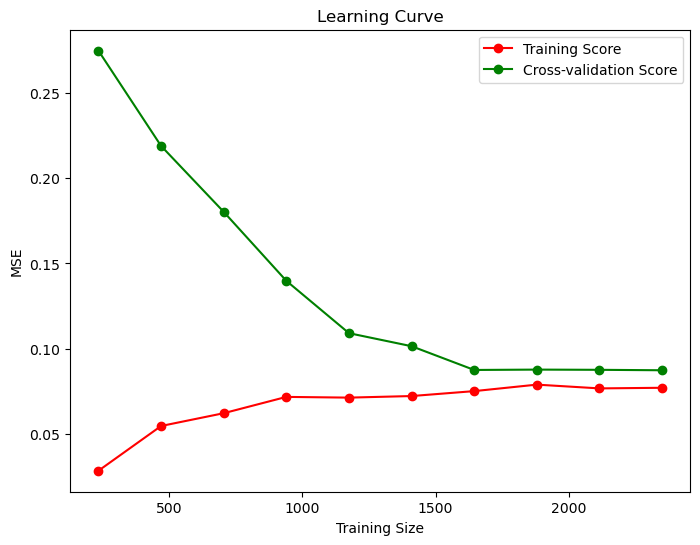

In [16]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    lasso_model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

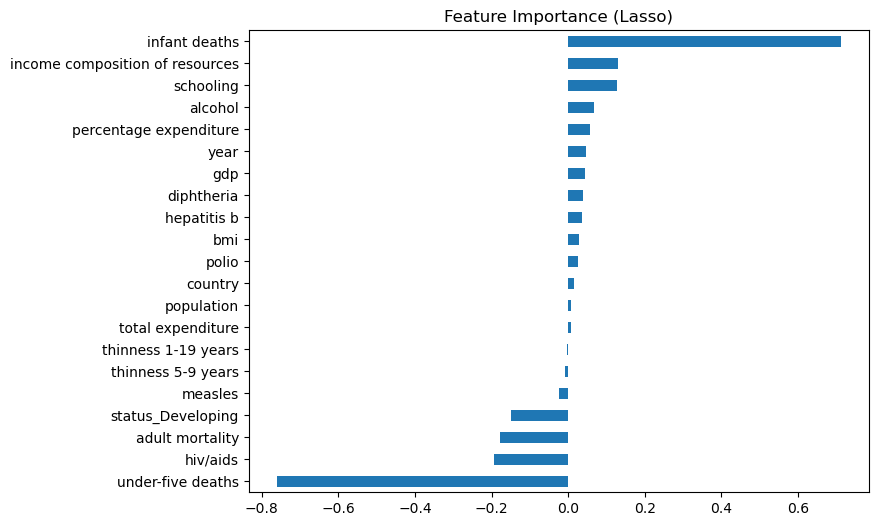

In [17]:
#Feature importance in Lasso Regression
coef = pd.Series(lasso_model.coef_, index=X_train.columns)

important_features = coef[coef != 0].sort_values()

plt.figure(figsize=(8, 6))
important_features.plot(kind='barh')
plt.title('Feature Importance (Lasso)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+00, tolerance: 1.290e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.092e-01, tolerance: 1.390e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.565e-01, toler

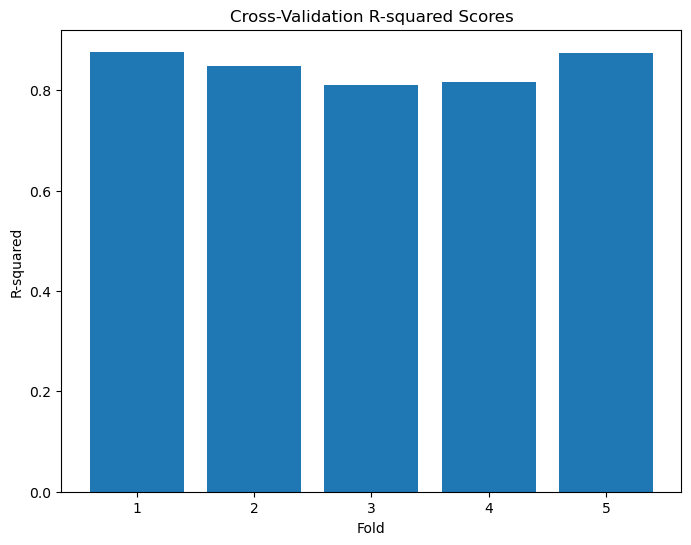

In [18]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title('Cross-Validation R-squared Scores')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.show()